## Abstract

The objective of this project is to explore the different characteristics that can affect decision-making in the dating app industry. We will examine how user profile attributes (photos, bios, demographics, interests), app-specific features (algorithms, design, messaging), user behavior (swiping patterns, communication styles), and broader social and psychological factors (biases, societal norms) interact to shape the success or failure of matches. By analyzing these diverse elements, we aim to gain a deeper understanding of the complex dynamics of online dating and the decision-making processes involved.

## Industry Overview

The dating app industry has grown rapidly over the past decade, driven by increased smartphone usage, shifting social norms around online dating, and advancements in matching algorithms. Major players like Tinder, Bumble, and Hinge dominate the market, offering a range of user experiences from casual connections to long-term relationships. The industry has also seen the rise of niche apps catering to specific communities and interests. Revenue is primarily generated through subscription models, in-app purchases, and advertising. As competition intensifies, platforms are focusing on user safety, AI-driven matchmaking, and expanding into international and underserved markets to sustain growth.

## About Dataset
This dataset provides a synthetic representation of user behavior on a fictional dating app. It contains 50,000 records with 19 features capturing demographic details, app usage patterns, swipe tendencies, and match outcomes.
Key features include gender, sexual orientation, location type, income bracket, education level, user interests, app usage time, swipe ratios, likes received, mutual matches, and match outcomes (e.g., "Mutual Match," "Ghosted," "Catfished"). The dataset is designed to be diverse and balanced, with categorical, numerical, and labeled variables for various analytical purposes.

-Source: https://www.kaggle.com/datasets/keyushnisar/dating-app-behavior-dataset/data



In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("darkgrid")

## Exploratory Data Analysis (EDA)

1. Data set Overview:


2. Summary Statistics:

3. Missing values:



In [22]:
##   Import Data set 
#url = r'C:\Python_repository\PERSONAL\coder_house\Dating_app_behavior_coderhouse\dating_app_behavior_dataset.csv'
# Update the file path to the correct location
url = r'C:\Python_repository\PERSONAL\coder_house\Dating_app_behavior_coderhouse\Dating_app_behavior_dataset_modified.csv'

# Load the dataset
df = pd.read_csv(url)
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,139,69,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,200,53,3,301,35,0.42,0,Morning,Mutual Match
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,97,36,2,309,33,0.41,1,After Midnight,One-sided Like
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,153,32,5,35,5,0.07,21,Morning,Mutual Match
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,88,38,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,167,83,4,112,87,0.18,10,Early Morning,Mutual Match
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,124,63,3,202,82,0.32,14,Morning,Mutual Match
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,129,39,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,46,4,239,67,0.27,8,Late Night,One-sided Like
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,152,74,3,1,92,0.27,23,Afternoon,Mutual Match


# Swipe Right Distribution
The distribution of swipe_right_ratio shows that the majority of users have a swipe right rate between 0.3 and 0.7, with an average of approximately 0.5. This indicates that users are moderately selective, although there is a small group of users ("Swipe Maniacs") with rates close to 1, which suggests little selectivity. The distribution is slightly skewed to the right, with a standard deviation of ~0.2, indicating variability in behaviors. This visualization is relevant to question 2, as the swipe right rate reflects user activity, which could correlate with more matches.


Resumen numérico de swipe_right_ratio:
count    50000.000000
mean         0.500655
std          0.197468
min          0.000000
25%          0.370000
50%          0.500000
75%          0.640000
max          1.000000
Name: swipe_right_ratio, dtype: float64


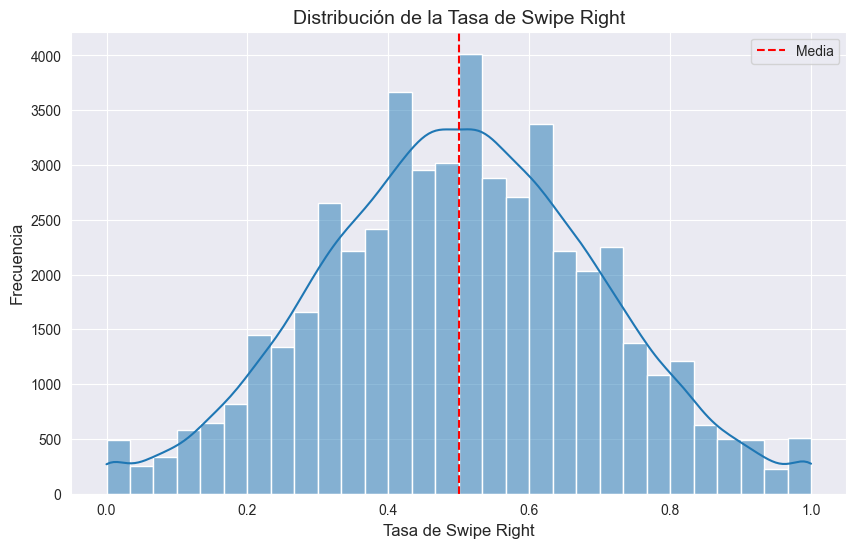

In [44]:
# Distribución de swipe_right_ratio (univariada)
plt.figure(figsize=(10, 6))
sns.histplot(df['swipe_right_ratio'], bins=30, kde=True)
plt.title('Distribución de la Tasa de Swipe Right', fontsize=14)
plt.xlabel('Tasa de Swipe Right', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(df['swipe_right_ratio'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
print("\nResumen numérico de swipe_right_ratio:")
print(df['swipe_right_ratio'].describe())
plt.show()

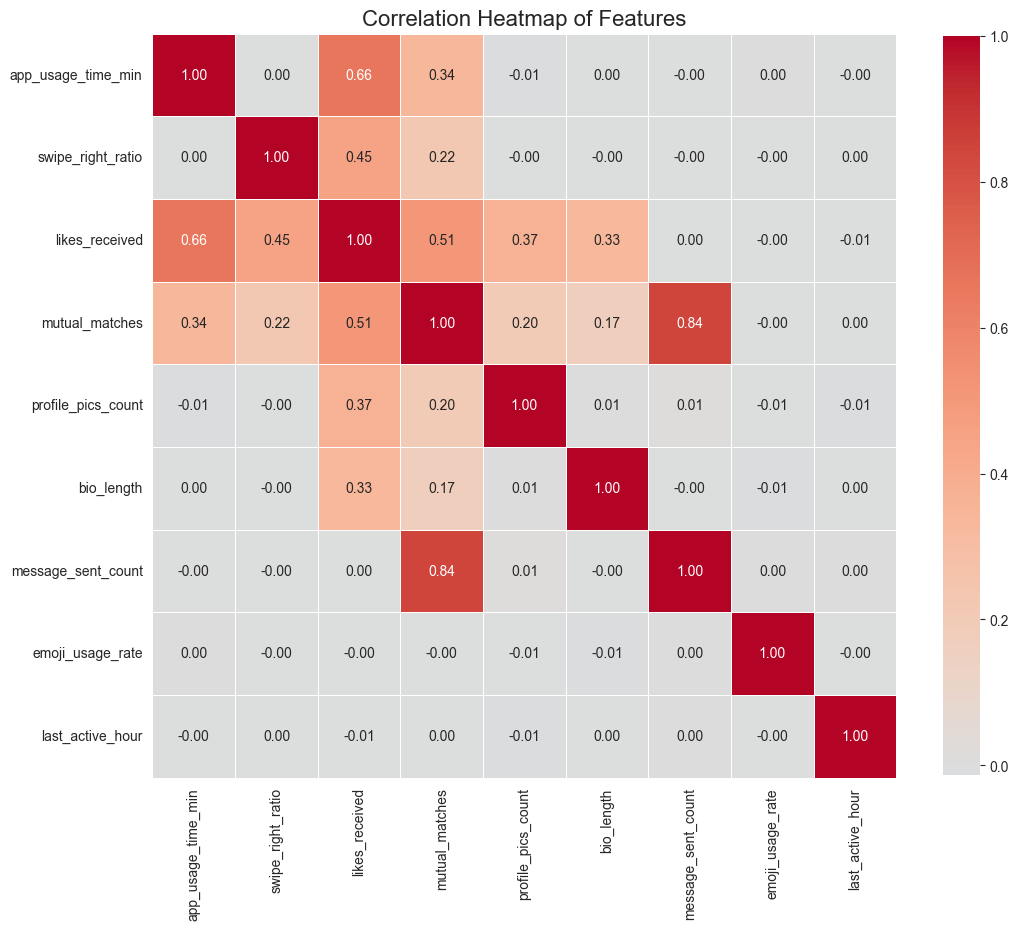

In [23]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

In [24]:
df['sexual_orientation'].value_counts()

sexual_orientation
Straight      6326
Lesbian       6315
Demisexual    6301
Queer         6288
Asexual       6254
Pansexual     6237
Bisexual      6158
Gay           6121
Name: count, dtype: int64

In [25]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                50000 non-null  object 
 1   sexual_orientation    50000 non-null  object 
 2   location_type         50000 non-null  object 
 3   income_bracket        50000 non-null  object 
 4   education_level       50000 non-null  object 
 5   interest_tags         50000 non-null  object 
 6   app_usage_time_min    50000 non-null  int64  
 7   app_usage_time_label  50000 non-null  object 
 8   swipe_right_ratio     50000 non-null  float64
 9   swipe_right_label     50000 non-null  object 
 10  likes_received        50000 non-null  int64  
 11  mutual_matches        50000 non-null  int64  
 12  profile_pics_count    50000 non-null  int64  
 13  bio_length            50000 non-null  int64  
 14  message_sent_count    50000 non-null  int64  
 15  emoji_usage_rate   

In [26]:
# Check data distribution
df.describe().round(0)


,app_usage_time_min,swipe_right_ratio,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,150.0,1.0,150.0,54.0,3.0,250.0,50.0,0.0,12.0
std,87.0,0.0,44.0,17.0,2.0,145.0,29.0,0.0,7.0
min,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,74.0,0.0,119.0,41.0,1.0,125.0,25.0,0.0,5.0
50%,150.0,0.0,150.0,54.0,3.0,250.0,50.0,0.0,12.0
75%,225.0,1.0,181.0,68.0,5.0,376.0,75.0,0.0,18.0
max,300.0,1.0,305.0,115.0,6.0,500.0,100.0,1.0,23.0


In [27]:
# Ceck null values
pd.isnull(df).sum()



gender                  0
sexual_orientation      0
location_type           0
income_bracket          0
education_level         0
interest_tags           0
app_usage_time_min      0
app_usage_time_label    0
swipe_right_ratio       0
swipe_right_label       0
likes_received          0
mutual_matches          0
profile_pics_count      0
bio_length              0
message_sent_count      0
emoji_usage_rate        0
last_active_hour        0
swipe_time_of_day       0
match_outcome           0
dtype: int64

# A heterosexual woman with a higher education level has a higher swipe rate than other types of women.

In [28]:
## High education level heteroxesual women do not have a cherry-picking behaviour (swipe_right_ratio)

In [29]:
df['education_level'].unique()

array(['Bachelor’s', 'No Formal Education', 'Master’s', 'Postdoc',
       'Associate’s', 'High School', 'Diploma', 'PhD', 'MBA'],
      dtype=object)

In [30]:
# Add column with education level in numeric format
df['education_level_numeric'] = df['education_level'].map({'Bachelor’s':4, 'No Formal Education':0, 'Master’s':5, 'Postdoc':8,
       'Associate’s':2, 'High School':1, 'Diploma':3, 'PhD':7, 'MBA':6}).astype(int)

df.groupby('education_level').agg(
    {'education_level_numeric': 'max'}
)

,education_level_numeric
education_level,
Associate’s,2
Bachelor’s,4
Diploma,3
High School,1
MBA,6
Master’s,5
No Formal Education,0
PhD,7
Postdoc,8


In [31]:
# Filter by gender and sexual_orientation
df.loc[(df['gender'] == 'Female') & (df['sexual_orientation'] == 'Straight') &(df['education_level_numeric'] >= 5)].head()


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,education_level_numeric
246,Female,Straight,Metro,Very High,Master’s,"Skating, Painting, Gardening",176,Addicted,0.56,Optimistic,135,47,2,198,34,0.45,5,Early Morning,Mutual Match,5
380,Female,Straight,Urban,Upper-Middle,PhD,"Motorcycling, Startups, Yoga",190,Extreme User,0.47,Optimistic,116,55,1,80,63,0.32,2,After Midnight,Mutual Match,7
396,Female,Straight,Remote Area,Very High,MBA,"Gaming, Memes, Stand-up Comedy",21,Low,0.82,Swipe Maniac,127,43,4,76,41,0.50,16,After Midnight,Chat Ignored,6
397,Female,Straight,Remote Area,High,MBA,"Running, Crafting, Startups",294,Extreme User,0.06,Choosy,118,45,1,221,37,0.33,12,Morning,Mutual Match,6
541,Female,Straight,Remote Area,High,Postdoc,"Pets, Makeup, Gardening",109,High,0.85,Swipe Maniac,218,73,6,380,59,0.14,8,After Midnight,Mutual Match,8


In [32]:
# Add a new column 'category' based on the conditions 
df['fem_cat'] = np.where(
    (df['gender'] == 'Female') & (df['sexual_orientation'] == 'Straight') & (df['education_level_numeric'] >= 5),
    'female_top',
    'female_low'
)
df_fem = df[(df['gender'] == 'Female')  & (df['sexual_orientation'] == 'Straight')]
df_fem.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,...,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,education_level_numeric,fem_cat
20,Female,Straight,Small Town,Very Low,Diploma,"Cooking, Startups, MMA",120,Addicted,0.68,Optimistic,...,62,4,126,74,0.20,19,Early Morning,One-sided Like,3,female_low
157,Female,Straight,Suburban,Middle,Diploma,"Dancing, Binge-Watching, Gardening",95,High,0.49,Optimistic,...,51,6,474,37,0.21,1,Early Morning,Mutual Match,3,female_low
232,Female,Straight,Urban,Very High,No Formal Education,"Fitness, Dancing, Skating",186,Extreme User,0.73,Swipe Maniac,...,24,1,91,4,0.05,17,After Midnight,One-sided Like,0,female_low
246,Female,Straight,Metro,Very High,Master’s,"Skating, Painting, Gardening",176,Addicted,0.56,Optimistic,...,47,2,198,34,0.45,5,Early Morning,Mutual Match,5,female_top
380,Female,Straight,Urban,Upper-Middle,PhD,"Motorcycling, Startups, Yoga",190,Extreme User,0.47,Optimistic,...,55,1,80,63,0.32,2,After Midnight,Mutual Match,7,female_top
396,Female,Straight,Remote Area,Very High,MBA,"Gaming, Memes, Stand-up Comedy",21,Low,0.82,Swipe Maniac,...,43,4,76,41,0.50,16,After Midnight,Chat Ignored,6,female_top
397,Female,Straight,Remote Area,High,MBA,"Running, Crafting, Startups",294,Extreme User,0.06,Choosy,...,45,1,221,37,0.33,12,Morning,Mutual Match,6,female_top
464,Female,Straight,Urban,Upper-Middle,High School,"Gaming, Startups, K-pop",111,High,0.21,Balanced,...,21,0,362,15,0.59,2,Late Night,One-sided Like,1,female_low
541,Female,Straight,Remote Area,High,Postdoc,"Pets, Makeup, Gardening",109,High,0.85,Swipe Maniac,...,73,6,380,59,0.14,8,After Midnight,Mutual Match,8,female_top
544,Female,Straight,Suburban,Very High,Bachelor’s,"Clubbing, Gardening, Languages",223,Extreme User,0.33,Balanced,...,28,0,103,20,0.02,8,Morning,One-sided Like,4,female_low


In [33]:

# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number'])

# Pivot the table to change categories to columns and data to rows
df_pivot = numeric_columns.groupby(df['fem_cat']).mean().transpose()
df_pivot


fem_cat,female_low,female_top
app_usage_time_min,149.940524,147.133733
swipe_right_ratio,0.500682,0.498024
likes_received,149.558355,148.167665
mutual_matches,54.469403,54.514970
profile_pics_count,2.988121,2.948104
bio_length,250.149256,252.658683
message_sent_count,50.062830,50.972056
emoji_usage_rate,0.286300,0.276866
last_active_hour,11.523485,11.355289
education_level_numeric,3.971111,6.522954


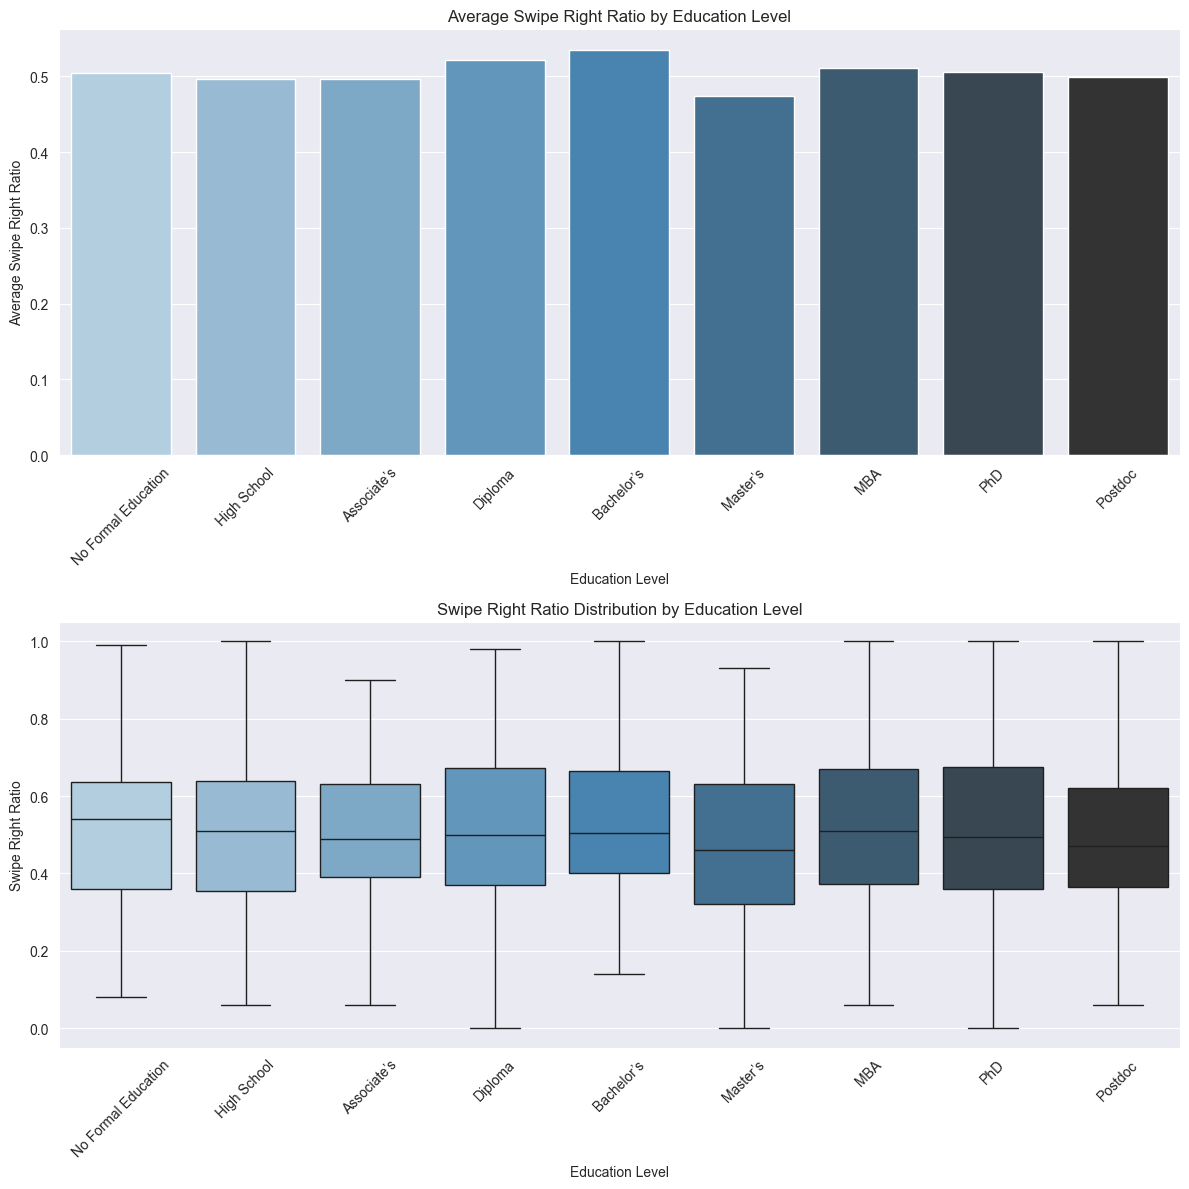

In [34]:
# Chart women swipe rations based on education level
import matplotlib.pyplot as plt
import seaborn as sns   

#Calculate the average swipe right ratio for each education level
average_swipe_right_ratio = df_fem.groupby(['education_level', 'education_level_numeric'])['swipe_right_ratio'].mean().reset_index().sort_values('education_level_numeric', ascending=True)


# Create a unique panel for the two charts
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Barplot for average swipe right ratio by education level
sns.barplot(ax=axes[0], x='education_level', y='swipe_right_ratio', data=average_swipe_right_ratio, palette='Blues_d', hue='education_level_numeric', legend=False)
axes[0].set_title('Average Swipe Right Ratio by Education Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Average Swipe Right Ratio')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for swipe right ratio distribution by education level
sns.boxplot(ax=axes[1], x='education_level', y='swipe_right_ratio', data=df_fem.sort_values('education_level_numeric', ascending=True), palette='Blues_d',hue='education_level_numeric', legend=False)
axes[1].set_title('Swipe Right Ratio Distribution by Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Swipe Right Ratio')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# More elaborate profile increases the likelihood of having more mutual matches.

In [ ]:
# Filter dataset to include only sexual orientation, profile pictures count, bio length, and swipe right ratio
df_filtered = df[['sexual_orientation', 'profile_pics_count', 'bio_length', 'c']].copy()      

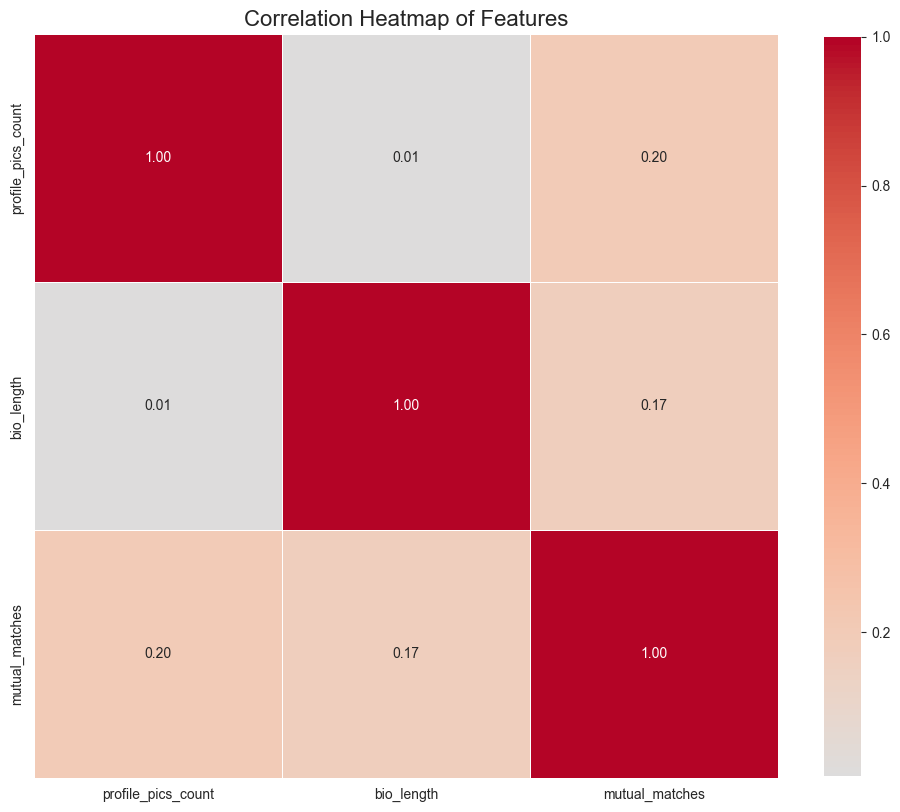

In [41]:
# Select only numeric columns for correlation
numeric_df = df_filtered.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

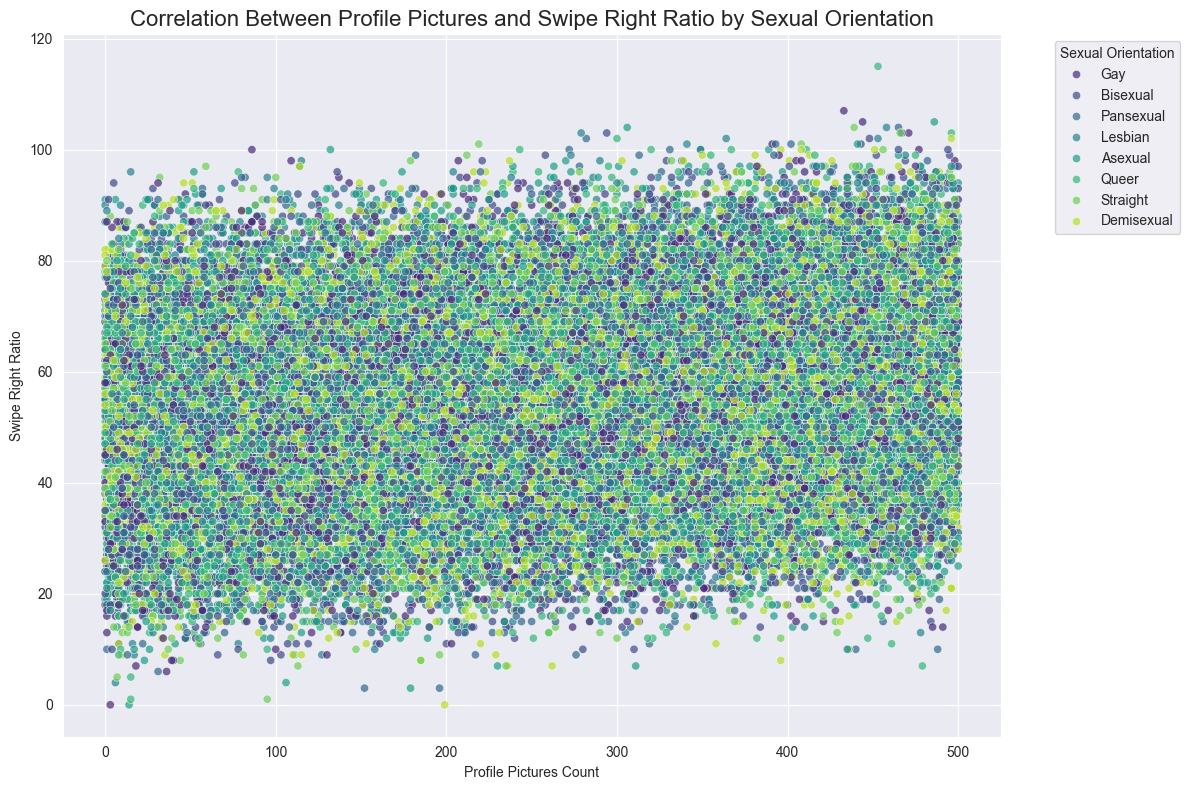

In [43]:
# Create a scatter plot to show the correlations between profile pictures and swipe right ratio per each sexual orientation
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='bio_length', y='mutual_matches', hue='sexual_orientation', palette='viridis', alpha=0.7)
plt.title('Correlation Between Profile Pictures and Swipe Right Ratio by Sexual Orientation', fontsize=16)
plt.xlabel('Profile Pictures Count')
plt.ylabel('Swipe Right Ratio')
plt.legend(title='Sexual Orientation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# Reset the index of the grouped DataFrame
grouped_df_reset = grouped_df.reset_index(drop=True)

# Compute the correlation matrix
correlation_matrix_grouped = grouped_df_reset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap for Grouped Data', fontsize=16)
plt.show()


NameError: name 'grouped_df' is not defined

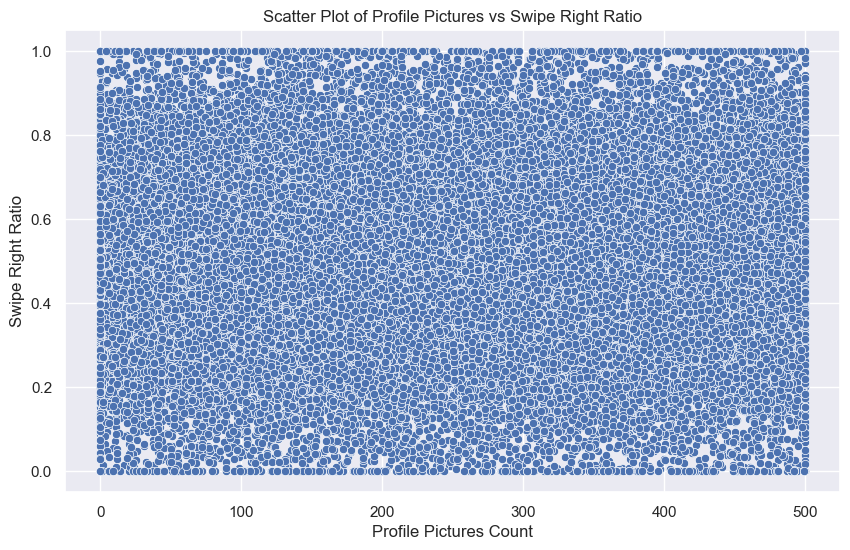

In [ ]:
# scatter plot for profile pictures and swipe right ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bio_length', y='swipe_right_ratio')
plt.title('Scatter Plot of Profile Pictures vs Swipe Right Ratio')
plt.xlabel('Profile Pictures Count')    
plt.ylabel('Swipe Right Ratio')
plt.show()


# Correlation between app usage time and mutual matches.

Correlation between message_sent_count and mutual_matches: 0.27


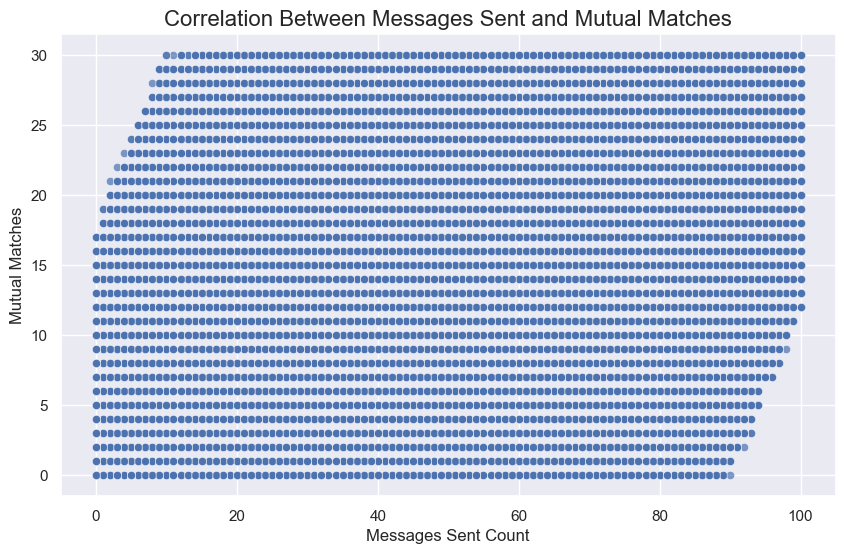

In [ ]:
# Correlation between app messages and mutual matches.

# Compute the correlation
correlation = df['message_sent_count'].corr(df['mutual_matches'])

# Print the correlation value
print(f"Correlation between message_sent_count and mutual_matches: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='message_sent_count', y='mutual_matches', alpha=0.7)
plt.title('Correlation Between Messages Sent and Mutual Matches', fontsize=16)
plt.xlabel('Messages Sent Count')
plt.ylabel('Mutual Matches')
plt.show()

